In [1]:
import cv2 
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import utils as ut
import refFont

font = refFont.Font()

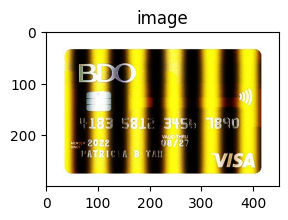

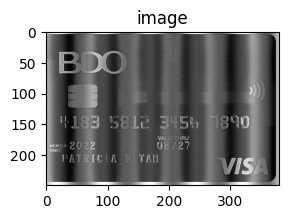

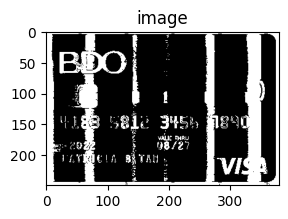

In [2]:

image = cv2.imread("./TC/12.jpg")
gray=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
otsuThresh= cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
otsuThresh,(start_row, end_row, start_col, end_col)=ut.removeBackground(otsuThresh,5)
grayCropped=gray[start_row:end_row,start_col:end_col]

image2,grayCropped=ut.fixSinsoidalNoise(grayCropped)
ret, grayCropped = cv2.threshold(image2, 150, 255, cv2.THRESH_BINARY)

ut.showImage(image)
ut.showImage(image2)
#ut.showImage(cv2.cvtColor(image2, cv2.COLOR_GRAY2BGR))
ut.showImage(grayCropped)
# ut.showImage(ut.fixSinsoidalNoise(gray))

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')  # Switch to an interactive backend like TkAgg

# Load your grayscale image
gray = cv2.imread('./TC/12.jpg', cv2.IMREAD_GRAYSCALE)
otsuThresh= cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
otsuThresh,(start_row, end_row, start_col, end_col)=ut.removeBackground(otsuThresh,5)
grayCropped=gray[start_row:end_row,start_col:end_col]

# Apply the 2D Fourier Transform
f_transform = np.fft.fft2(grayCropped)
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

# Display the magnitude spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Click on the bright spots to get coordinates')

# Capture click events
coords = plt.ginput(2)  # Waits for 2 clicks, returns list of (x, y) tuples
plt.show()

print("Clicked coordinates:", coords)


Clicked coordinates: [(189.38548387096773, 123.88548387096773), (194.30161290322582, 124.5)]


: 